In [1]:
from djexpcode.schemas import *
from djexpcode import *
import pandas as pd
import djexpcode
pngsavepath = os.path.abspath(pjoin(os.path.dirname(os.path.dirname(djexpcode.__file__)),'figures/figure2'))
if not os.path.isdir(pngsavepath):
    os.mkdir(pngsavepath)
    print(pngsavepath)

pdfsavepath = os.path.abspath(pjoin(pngsavepath,'pdf'))
if not os.path.isdir(pdfsavepath):
    os.mkdir(pdfsavepath)
    print(pdfsavepath)
# For exporting notebook to bitbucket
%matplotlib notebook


Connecting root@localhost:3306


In [2]:
# %matplotlib notebook

# Load a dataset (better using a single key.)
keys = [dict(session_name = '190204_JC092_2P_V1_JC',
             session_subname = 'run02_closedLoopActuator')]
# keys = [dict(session_name = '190126_JC092_2P_Str_JC',
#              session_subname = 'run02_closedLoopActuator')]
# keys = [dict(session_name = '190126_JC092_2P_V1a_JC',
#              session_subname = 'run04_closedLoopActuator')]

dfs = []
for k in keys:
    dfs.append(pd.DataFrame((TwoPhotonVolume()*
                             PositionMaps.ActivityMaps()*
                             PositionMapsStats.ActivityMapStats()*
                             TreadmillPositionExperiment()*TreadmillBelt()
                             & k).fetch()))
df = pd.concat(dfs)

In [9]:
exprun,expses,val,reca,light = (TwoPhotonVolume()*PositionMaps.ActivityMaps()*
 PositionMapsStats.ActivityMapStats()*
 TreadmillPositionExperiment()*TreadmillBelt()).fetch('session_name',
                                                      'session_subname',
                                                      'is_position',
                                                     'recording_area',
                                                     'light_conditions')


In [8]:
np.where(dat.is_position>0)


(array([], dtype=int64),)

session_name           session_subname recording_area  \
12792      180316_JC062_2P_JC                run05_gray             RL   
19624   171129_EV038_2P_S1_JC          run02_gray_puffs             S1   
23281      170731_JC027_2P_JC     run01_dark_barrels_T6             S1   
23381      170802_JC027_2P_JC          run02_dark_S1_T6             S1   
54536      171206_EV038_2P_JC                run03_gray             V1   
58599  171206_EV038_2P_lat_JC                run01_gray             V1   
59780      170802_JC027_2P_JC          run04_dark_V1_T6             V1   
62870      180113_JC049_2P_SK           run01_darkblock             V1   
63018      180114_JC049_2P_SK           run01_darkblock             V1   
63236      180114_JC049_2P_SK                run03_dark             V1   
63345      180122_JC049_2P_SK                run01_dark             V1   
63469      180123_JC049_2P_SK                run01_dark             V1   
63609      180117_JC060_2P_SK                run01_dark             V1   
64001      180208_JC060_2P_JC  run00_closedLoopActuator             V1   
65557      180208_JC060_2P_JC  run01_closedLoopActuator             V1   
84652      180830_KS501_2P_JC  run00_closedLoopActuator             V1   
88282      180209_SK072_2P_JC  run00_closedLoopActuator             V1   
89805      180209_SK072_2P_JC  run01_closedLoopActuator             V1   
94593      180209_SK072_2P_JC  run04_closedLoopActuator             V1   
95564      180209_SK072_2P_JC  run05_closedLoopActuator             V1   

       frac_cells  
12792         319  
19624           0  
23281           0  
23381          62  
54536           0  
58599          45  
59780           0  
62870           0  
63018           2  
63236           0  
63345           0  
63469           0  
63609           0  
64001          24  
65557          25  
84652          14  
88282           6  
89805          90  
94593           1  
95564           4

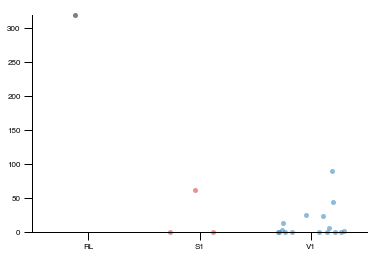

In [15]:
dat = pd.DataFrame(zip(exprun,expses,val,reca,light),
                   columns=[
                       'session_name',
                       'session_subname',
                       'is_position',
                       'recording_area','light_conditions'])
dat = dat[dat.light_conditions == 'dark']
sesses  = dat[['session_name',
               'session_subname',
               'recording_area']].drop_duplicates()
points = []
for i,(ss,sss,a) in sesses.iterrows() :
    idx = np.where((dat.session_name == ss) & (dat.session_subname == sss))[0]
    points.append((np.sum(dat.is_position.iloc[idx] > 0)))

sesses['frac_cells'] = points
keys = sesses.recording_area.unique()
vals = [sesses[sesses.recording_area == a].frac_cells for a in keys]
markerpar = {'clip_on': False, 'markersize': 10, 'alpha': 0.5, 'lw': 0, 'markeredgecolor': 'none'}
plt.clf()
plotScatterMultipleVariables(vals,labels=keys,markerpar = markerpar)
sesses

In [23]:
key = dict(session_name = '170802_JC027_2P_JC',
          session_subname = 'run02_dark_S1_T6')
# key = dict(session_name = '180830_KS501_2P_JC',
#           session_subname = 'run00_closedLoopActuator')
# key = dict(session_name = '180209_SK072_2P_JC',
#           session_subname = 'run00_closedLoopActuator')

dd = pd.DataFrame((PositionMaps.ActivityMaps()*PositionMapsStats.ActivityMapStats() & key).fetch())

{'fig': <Figure size 432x288 with 1 Axes>,
 'ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fb698155da0>,
 'im': <matplotlib.image.AxesImage at 0x7fb6a8dd8080>}

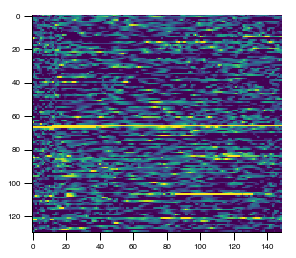

In [8]:
nbPlayStack(np.stack(dd.df_f_map.iloc[dd.is_cue_responsive]),clim=[0,25])

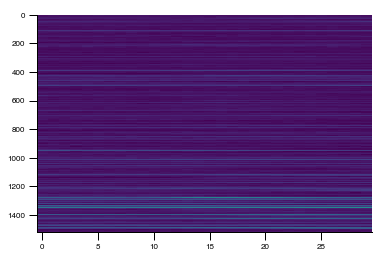

In [9]:
plt.imshow(np.stack(dd.mean_cue_df_f)[:,2,:],clim=[0,150],aspect = 'auto')

F_onewayResult(statistic=0.9998715393377245, pvalue=0.4170352373160888) [1.05373146e-04 2.73360180e-07 6.11420911e-03]


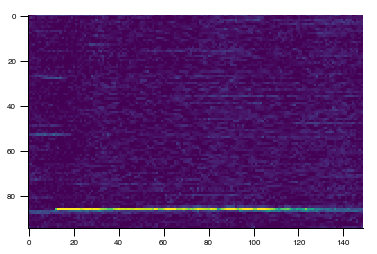

In [24]:
from scipy.stats import f_oneway
i = 55


plt.clf()
plt.imshow(dd.df_f_map.iloc[i]/np.max(dd.df_f_map.iloc[i]),
           clim = [0,0.8])
print(f_oneway(*[a for a in np.concatenate([dd.cue_amplitudes.iloc[i],
                dd.cue_amplitudes_pre.iloc[i][:,:]],axis = 0)]),
      dd.cue_pvalues.iloc[i])

In [25]:
amp = [np.nanmean(d.cue_amplitudes - d.cue_amplitudes_pre) 
 for i,d in dd.iterrows()]
idx = [f_oneway(*[a for a in np.concatenate([dd.cue_amplitudes.iloc[i],
                dd.cue_amplitudes_pre.iloc[i][:,:]],axis = 0)]).pvalue<0.05 for i in range(len(dd))]
idx = np.where((np.array(amp)>2.5) & (np.array(idx)))[0]

62 87 0.7126436781609196


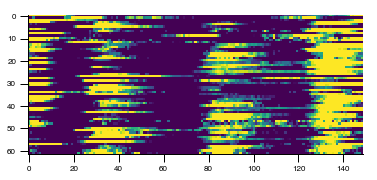

In [27]:
plt.clf()
mm = np.stack(dd.mean_position_df_f.iloc[idx])
plt.imshow(zscore(mm,axis=1),clim=[0,1])
print(len(idx),len(dd),len(idx)/len(dd))

[1.1303359171387921,
 1.378115155314551,
 2.129944957083935,
 0.0641868716403049,
 0.23784194776095965,
 0.3336209006871064,
 0.014449778706554105,
 -0.18857768231501282,
 0.10782219842438856,
 0.7952422816686341,
 0.18017279329649893,
 -0.13620060295855246,
 0.4824488305003906,
 1.2735061008168982,
 0.3613201951771793,
 -0.1606156456451795,
 0.5029027333817722,
 -0.12252015775773259,
 -0.15924870429356683,
 0.7618346171387839,
 0.2376322229885282,
 0.11710588012926408,
 -0.45336186995966044,
 0.25376000966251117,
 -0.7470804886919107,
 1.1366211524007745,
 0.12150818963340035,
 0.10940227072439569,
 -1.060567480288442,
 -0.026282171222710943,
 -0.4662518860380018,
 0.2977247162396795,
 -0.2663532911373485,
 0.27212729074694214,
 0.4945099688646963,
 0.2690172854288634,
 -0.45445100815078415,
 -0.04201838340994987,
 2.3117862570916596,
 -0.12164842267077301,
 -0.3238587849571222,
 -0.9597681554674867,
 -1.328380229473132,
 0.6363084661247772,
 2.0900854184653923,
 -0.36453978103073237,

### Overview of all cells

* Pie charts
* Cumulatives of responsive cells

In [3]:
import pandas as pd
variables = ['recording_area','mouse_id',
             'session_name','session_subname',
             'is_puff_responsive','is_cue_responsive',
             'puff_amplitudes','cue_amplitudes',
             'puff_amplitudes_pre','cue_amplitudes_pre',
             'enucleated'] 

# identify "closedloop" experiments 
from djexpcode.schemas import *
from djexpcode import *

nn,ss,area,enu = (TwoPhotonVolume()*TreadmillPositionExperiment()).fetch('session_name',
                                                                         'session_subname',
                                                                         'recording_area',
                                                                         'enucleated')
keys = []
for n,s,a,e in zip(nn,ss,area,enu):
    if 'closedLoop' in s:
        if not 'BlackLaps' in s:
            if e:
                e = 'enucleated'
            else:
                e = ''
            keys.append(dict(session_name=n,session_subname=s,area = a,enucleated = e))
print('Closed loop experiments:')
for k in keys:
    print('\t {area} \t {session_name} - {session_subname}  \t {enucleated}'.format(**k))

dfs = []
for k in keys:
    np.warnings.filterwarnings('ignore')
    df = pd.DataFrame.from_records(zip(*(StimulusAirPuff.Triggered()*StimulusAirPuff()
                       *TwoPhotonVolume()*
                       PositionMaps.ActivityMaps()*
                       PositionMapsStats.ActivityMapStats()*
                       TreadmillPositionExperiment()*TreadmillBelt()
                       & dict(session_name = k['session_name'],
                             session_subname = k['session_subname'])).fetch(*variables)),
                                 columns = variables)
    dfs.append(df)
df = pd.concat(dfs)
animalsessions = df[df.recording_area == 'V1'][['mouse_id','session_name','session_subname']].drop_duplicates()
ndf = []
for dd in range(len(animalsessions)):
    dd = animalsessions.iloc[dd]
    ndf.append(df[(df.session_name == dd.session_name) & (df.session_subname == dd.session_subname)])
ndf = pd.concat(ndf)

Closed loop experiments:
	 S1 	 171201_EV038_2P_S1_JC - run00_closedLoopActuator  	 enucleated
	 S1 	 171201_EV038_2P_S1_JC - run01_closedLoopActuator  	 enucleated
	 V1 	 171201_EV038_2P_V1_JC - run00_closedLoopActuator  	 enucleated
	 V1 	 180208_JC060_2P_JC - run00_closedLoopActuator  	 
	 V1 	 180208_JC060_2P_JC - run01_closedLoopActuator  	 
	 S1 	 181008_JC079_2P_JC - run00_closedLoopActuator  	 
	 S1 	 190126_JC092_2P_S1_JC - run00_closedLoopActuator  	 
	 Str 	 190126_JC092_2P_Str_JC - run02_closedLoopActuator  	 
	 V1a 	 190126_JC092_2P_V1a_JC - run04_closedLoopActuator  	 
	 S1 	 190201_JC093_2P_S1_JC - run00_closedLoopActuator  	 
	 V1 	 190201_JC093_2P_V1_JC - run02_closedLoopActuator  	 
	 V1 	 180830_KS501_2P_JC - run00_closedLoopActuator  	 
	 V1 	 180209_SK072_2P_JC - run00_closedLoopActuator  	 
	 V1 	 180209_SK072_2P_JC - run01_closedLoopActuator  	 
	 V1 	 180209_SK072_2P_JC - run04_closedLoopActuator  	 
	 V1 	 180209_SK072_2P_JC - run05_closedLoopActuator  	 
	 V1 

5 17 (27498, 11)
Ks_2sampResult(statistic=0.14278557114228457, pvalue=3.0865209311343087e-18)
Ks_2sampResult(statistic=0.21781437125748504, pvalue=3.224028964572387e-28)


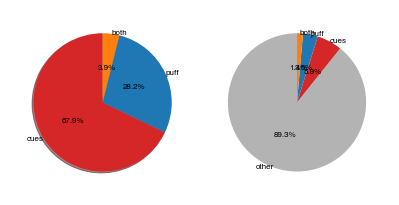

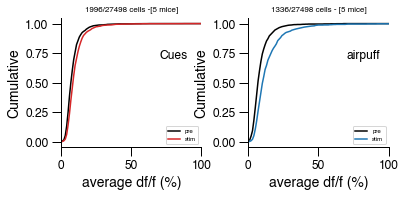

In [4]:

# Number of cells responding to each condition
fig = plt.figure()
fig.add_axes([.1,.1,0.4,0.8])
ncellsboth = np.sum((df.is_cue_responsive == 1) & (ndf.is_puff_responsive == 1))
ncellspuff = np.sum((df.is_cue_responsive == 0) & (ndf.is_puff_responsive == 1))
ncellscues = np.sum((df.is_cue_responsive == 1) & (ndf.is_puff_responsive == 0))
plt.pie([ncellscues,ncellspuff,ncellsboth], explode=(0.0, 0.0, 0.0), 
        labels=['cues','puff','both'], colors=colors[1:], 
        autopct='%2.1f%%',pctdistance=.5,labeldistance=1.,
        shadow=True, startangle=90,textprops=dict(fontsize=8))
fig.add_axes([.55,.1,0.4,0.8])
ncellsboth = np.sum((ndf.is_cue_responsive == 1) & (ndf.is_puff_responsive == 1))
ncellspuff = np.sum((ndf.is_cue_responsive == 0) & (ndf.is_puff_responsive == 1))
ncellscues = np.sum((ndf.is_cue_responsive == 1) & (ndf.is_puff_responsive == 0))
ncellsother = np.sum((ndf.is_cue_responsive == 0) & (ndf.is_puff_responsive == 0))
plt.pie([ncellsother,ncellscues,ncellspuff,ncellsboth], 
        explode=(0.0,0.0, 0.0, 0.0), 
        labels=['other','cues','puff','both'], 
        colors=[[0.7,0.7,0.7]]+colors[1:], 
        autopct='%2.1f%%',pctdistance=.5,labeldistance=1.,
        shadow=False, startangle=90,textprops=dict(fontsize=8));
fname = pjoin(pdfsavepath,'fig1_2_closed_loop_actuator_S1_piecharts.pdf')
plt.savefig(fname);
plt.savefig(fname.replace('.pdf','.svg'));
print(len(animalsessions['mouse_id'].drop_duplicates()),len(animalsessions),np.shape(ndf))

# Cue and puff histograms
animalsessions = df[df.recording_area == 'V1'][['mouse_id','session_name','session_subname']].drop_duplicates()
ndf = []
for dd in range(len(animalsessions)):
    dd = animalsessions.iloc[dd]
    ndf.append(df[(df.session_name == dd.session_name) & (df.session_subname == dd.session_subname)])
ndf = pd.concat(ndf)
# Cells responding to each condition get the amplitudes stim and pre
sel = ndf[['cue_amplitudes','cue_amplitudes_pre',
           'puff_amplitudes','puff_amplitudes_pre']].copy()
sel['cue_avg'] = 0
sel['cue_avg_pre'] = 0
sel['puff_avg'] = 0
sel['puff_avg_pre'] = 0
for s in range(len(sel)):
    sel.cue_avg.iloc[s] = sel.cue_amplitudes.iloc[s].mean()
    sel.cue_avg_pre.iloc[s] = sel.cue_amplitudes_pre.iloc[s].mean()
    sel.puff_avg.iloc[s] = sel.puff_amplitudes.iloc[s].mean()
    sel.puff_avg_pre.iloc[s] = sel.puff_amplitudes_pre.iloc[s].mean()
    
from scipy.stats import ks_2samp    
# Figure
fig = plt.figure(figsize = [6.5,3])
fig.add_axes([.2,.2,0.3,0.6])
edges = np.arange(0,500)
idx = (ndf.is_cue_responsive == 1)
plotCumulative(np.array(sel[idx].cue_avg_pre).flatten(),edges,
               color = colors[0],label = 'pre')
plotCumulative(np.array(sel[idx].cue_avg).flatten(),edges,
               color = colors[1],
               label = 'stim')
plt.xlim([0,100])
plt.legend(fontsize = 6)
plt.xlabel('average df/f (%)')
plt.ylabel('Cumulative')
plt.title('{0}/{1} cells -[{2} mice]'.format(
    np.sum(idx),len(idx),len(np.unique(ndf.mouse_id))),
         fontsize = 8)
plt.text(70,0.7,'Cues',fontsize = 12)
print(ks_2samp(np.array(sel[idx].cue_avg_pre).flatten(),
               np.array(sel[idx].cue_avg).flatten()))

fig.add_axes([.6,.2,0.3,0.6])

idx = (ndf.is_puff_responsive == 1)
plotCumulative(np.array(sel[idx].puff_avg_pre).flatten(),edges,
               color = colors[0],label = 'pre')
plotCumulative(np.array(sel[idx].puff_avg).flatten(),edges,
               color = colors[2],
               label = 'stim')
plt.xlim([0,100])
plt.legend(fontsize = 6)
plt.xlabel('average df/f (%)')
plt.ylabel('Cumulative')
plt.title('{0}/{1} cells - [{2} mice]'.format(
    np.sum(idx),len(idx),len(np.unique(ndf.mouse_id))),
         fontsize = 8)
plt.text(70,0.7,'airpuff',fontsize = 12)
print(ks_2samp(np.array(sel[idx].puff_avg_pre).flatten(),
               np.array(sel[idx].puff_avg).flatten()))
# fname = pjoin(pdfsavepath,'fig1_2_closed_loop_actuator_V1_cumulatives.pdf')
# plt.savefig(fname);
# plt.savefig(fname.replace('.pdf','.svg'));
# fname = pjoin(pngsavepath,'fig1_2_closed_loop_actuator_V1_cumulatives.png')
# plt.savefig(fname);

In [36]:
tmp1 = np.vstack([np.array(sel.puff_avg_pre).flatten(),np.array(sel.puff_avg).flatten()])
tmp2 = np.vstack([0*np.array(sel.puff_avg_pre).flatten(),1+0*np.array(sel.puff_avg).flatten()])
plt.figure()
plt.plot(tmp2[:,:],tmp1[:,:],'k.-',alpha = 0.05);


In [26]:
tmp1[:,:10]

array([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]])

In [10]:
# %matplotlib notebook

# Load a dataset (better using a single key.)
# keys = [dict(session_name = '190126_JC092_2P_V1_JC',
#              session_subname = 'run00_closedLoopActuator')]
# keys = [dict(session_name = '190126_JC092_2P_Str_JC',
#              session_subname = 'run02_closedLoopActuator')]
keys = [dict(session_name = '190126_JC092_2P_V1a_JC',
             session_subname = 'run04_closedLoopActuator')]

dfs = []
for k in keys:
    dfs.append(pd.DataFrame((StimulusAirPuff.Triggered()*StimulusAirPuff()
                             *TwoPhotonVolume()*
                             PositionMaps.ActivityMaps()*
                             PositionMapsStats.ActivityMapStats()*
                             TreadmillPositionExperiment()*TreadmillBelt()
                             & k).fetch()))
df = pd.concat(dfs)

### Using experiment 190126_JC092_2P_V1a_JC

In this experiment I turned off the lights at lap 22 so will use 0-20 for light and 24-44 for no light.

In [46]:
# The response position maps
spre_std = np.stack(df.cue_amplitudes_pre).std(axis = 2).mean(axis = 1)
spre = np.stack(df.cue_amplitudes_pre).mean(axis = 2).mean(axis = 1)
sstim = np.stack(df.cue_amplitudes).mean(axis = 2).mean(axis = 1)
lightson = [0,20]
lightsoff = [24,44]
responseson = np.stack(df.df_f_map)[:,lightson[0]:lightson[1],:].mean(axis = 1)
responsesoff = np.stack(df.df_f_map)[:,lightsoff[0]:lightsoff[1],:].mean(axis = 1)

fig = plt.figure(figsize = [8,4])

fig.add_axes([.2,.2,.25,.7])
zscoredrespall = np.stack(((responseson.T - spre)/spre_std).T)
isrespflag = 1
zscoredresp = zscoredrespall[df.is_cue_responsive == 1] #[np.hstack([idx0,idx1])]

plt.imshow(np.vstack([zscoredresp]),
           clim = [0,2],cmap = 'gray_r',aspect = 'auto',origin = 'bottom',
          interpolation = 'none')

plt.xlim([0,150])
plt.xlabel('Position (cm)')
plt.ylabel('Cell #')
plt.colorbar(shrink=0.2,label = 'zscored df/f',
             anchor = (.5,1),panchor = False)

plt.vlines(df.belt_cues.iloc[0][:,0].flatten(),0,
           len(zscoredresp),color = colors[1],linestyle = '--',lw = 0.5)
for c in df.belt_cues.iloc[0]:
    plt.plot(c,np.array([0,0])+len(zscoredresp),'--',lw = 1,
             color = colors[1],clip_on = False)
# The puffs in space
key = dict(session_name = df.session_name.iloc[0],
       session_subname = df.session_subname.iloc[0])
timestamps = np.vstack([df.stim_onsets.iloc[0],
                         df.stim_offsets.iloc[0]]).T
Xd = lap_map_from_timestamps(timestamps,key)
xd = np.sum(Xd>1,axis = 0).squeeze()
idx = np.where(xd ==0)[0]
idx = np.hstack([idx,len(xd)])
puffinspace = [idx[idx<np.where(xd>xd.max()*.5)[0][0]][-1],
               idx[idx>np.where(xd>xd.max()*.5)[0][0]][0]]

plt.vlines(puffinspace[0],0,
           len(zscoredresp),color = colors[2],linestyle = '--',lw = 0.5)
plt.plot(puffinspace,np.array([0,0])+len(zscoredresp),':',lw = 1,
             color = colors[2],clip_on = False)
plt.ylim([0,len(zscoredresp)])
plt.title('[{2}] {0}\n{1}'.format(df.session_name.iloc[0],
                                       df.session_subname.iloc[0],
                                       df.recording_area.iloc[0]),
         fontsize = 8)
fig.add_axes([.7,.2,.25,.7])
zscoredrespall = np.stack(((responsesoff.T - spre)/spre_std).T)
zscoredresp = zscoredrespall[df.is_cue_responsive == 1] #[np.hstack([idx1,idx0])]

plt.imshow(np.vstack([zscoredresp]),
           clim = [0,2],cmap = 'gray_r',aspect = 'auto',origin = 'bottom',
          interpolation = 'none')

plt.xlim([0,150])
plt.xlabel('Position (cm)')
plt.ylabel('Cell #')
plt.colorbar(shrink=0.2,label = 'zscored df/f',
             anchor = (.5,1),panchor = False)

plt.vlines(df.belt_cues.iloc[0][:,0].flatten(),0,
           len(zscoredresp),color = colors[1],linestyle = '--',lw = 0.5)
for c in df.belt_cues.iloc[0]:
    plt.plot(c,np.array([0,0])+len(zscoredresp),'--',lw = 1,
             color = colors[1],clip_on = False)
# The puffs in space

plt.vlines(puffinspace[0],0,
           len(zscoredresp),color = colors[2],linestyle = '--',lw = 0.5)
plt.plot(puffinspace,np.array([0,0])+len(zscoredresp),':',lw = 1,
             color = colors[2],clip_on = False)
plt.ylim([0,len(zscoredresp)])
plt.title('[{2}] {0}\n{1}'.format(df.session_name.iloc[0],
                                       df.session_subname.iloc[0],
                                       df.recording_area.iloc[0]),
         fontsize = 8)
fnames = pjoin(pngsavepath,
               'fig2_closed_loop_actuator_lightoff_{session_name}_{session_subname}.png'.format(**k))
plt.savefig(fnames);
fnames = pjoin(pdfsavepath,'fig2_closed_loop_actuator_lightoff_{session_name}_{session_subname}.pdf'.format(**k))
plt.savefig(fnames); 
plt.savefig(fnames.replace('.pdf','.svg')); 

In [60]:
keys = [dict(session_name='180113_JC049_2P_SK',session_subname='run01_darkblock'),
        dict(session_name='180208_JC060_2P_JC',session_subname='run00_closedLoopActuator'),
        dict(session_name='180209_SK072_2P_JC',session_subname='run00_closedLoopActuator')]
dfs = []
for k in keys:
    dfs.append(pd.DataFrame((StimulusAirPuff.Triggered()*StimulusAirPuff()
                             *TwoPhotonVolume()*
                             PositionMaps.ActivityMaps()*
                             PositionMapsStats.ActivityMapStats()*
                             TreadmillPositionExperiment()*TreadmillBelt()
                             & k).fetch()))
df = pd.concat(dfs)

# List experiments on AAV mice...

Selection:

```
keys = [dict(session_name='180113_JC049_2P_SK',session_subname='run01_darkblock'),
        dict(session_name='180208_JC060_2P_JC',session_subname='run00_closedLoopActuator'),
        dict(session_name='180209_SK072_2P_JC',session_subname='run00_closedLoopActuator')]
```

In [59]:

# List experiments on AAV mice...
for mouse_id in ((Mouse().proj() & 'strain_name = "Rorb-IRES2-Cre-D"') +
                 (Mouse().proj() & 'strain_name = "C57BL/6J"')):
    keys = ['mouse_id','session_name','session_subname','shield_distance','n_trials','n_position_cells','n_total_cells']
    A = ((TreadmillPositionExperiment()*TwoPhotonVolume()*
          PositionMapsStats()*PositionMaps() & 'recording_area = "V1"' & mouse_id)).proj(*keys).fetch(as_dict=True)
    try:
        A = pd.DataFrame.from_dict(A)[keys]
    except:
        pass
    finally:
        print(A)

  mouse_id        session_name  session_subname  shield_distance  n_trials  \
0    JC049  180113_JC049_2P_SK  run01_darkblock              2.5        69   
1    JC049  180113_JC049_2P_SK      run02_light              2.5        63   
2    JC049  180114_JC049_2P_SK  run01_darkblock              2.5        51   
3    JC049  180114_JC049_2P_SK      run02_light              2.5        61   
4    JC049  180114_JC049_2P_SK       run03_dark              2.5        33   
5    JC049  180122_JC049_2P_SK       run01_dark              2.5        31   
6    JC049  180122_JC049_2P_SK      run02_light              2.5        53   
7    JC049  180123_JC049_2P_SK       run01_dark              2.5        45   
8    JC049  180123_JC049_2P_SK      run02_light              2.5        86   

   n_position_cells  n_total_cells  
0                 0             74  
1                 2             74  
2                 2            109  
3                 0            109  
4                 0            109

In [57]:
A

[]

In [36]:
from scipy.stats import ks_2samp 
fig = plt.figure()
fig.add_axes([.65,.35,0.2,0.2])
edges = np.arange(0,500)
spre = np.stack(df.cue_amplitudes_pre)
sstim = np.stack(df.cue_amplitudes)
idx = np.array(df.is_cue_responsive == 1) 
xon = np.nanmean(sstim[idx,:,lightson[0]:lightson[1]],axis = 2).mean(axis =1)
xoff = np.nanmean(sstim[idx,:,lightsoff[0]:lightsoff[1]],axis = 2).mean(axis=1)
xpreoff = np.nanmean(spre[idx,:,lightsoff[0]:lightsoff[1]],axis = 2).mean(axis=1)
xpreon = np.nanmean(spre[idx,:,lightson[0]:lightson[1]],axis = 2).mean(axis=1)

plotCumulative(xpreon,edges,color = [.5,.5,.5],label = 'pre photopic')
plotCumulative(xpreoff,edges,color = colors[0],label = 'pre darkness')
plotCumulative(xon,edges,
               color = colors[1],label = 'photopic')
plotCumulative(xoff,edges,
               color = colors[6],label = 'darkness')
pval = ks_2samp(xpre,xon)
pval = ks_2samp(xpre,xoff)

#plt.text(50,0.3,'pval:{0:1.3f}'.format(pval.pvalue))
plt.xlim([0,100])
plt.legend(fontsize = 6)
plt.xlabel('Mean df/f%')
plt.ylabel('Cumulative')
plt.title('{0}/{1} cells - ({3} cues) [{2} mouse]'.format(
    np.sum(idx),len(idx),len(np.unique(df.mouse_id)),spre.shape[1]),
         fontsize = 8)
plt.text(70,0.7,'Cues',fontsize = 12)

fig.add_axes([.15,.35,0.2,0.2])
plt.plot(np.clip(xoff,-20,100),
         np.clip(xon,-20,100),'ko',
               color = colors[0],markersize = 1,alpha = 0.5)
pval = ks_2samp(xoff.flatten(),xon.flatten())

plt.text(50,0.3,'pval:{0:1.3f}'.format(pval.pvalue))
plt.xlim([0,100])
plt.ylim([0,100])
plt.plot([0,100],[0,100],'k',lw = 1)
plt.xlabel('Mean df/f% (Darkness)')
plt.ylabel('Mean df/f% (Photopic)')
fnames = pjoin(pngsavepath,
               'fig2_closed_loop_actuator_lightoff_cumulatives_{session_name}_{session_subname}.png'.format(**k))
plt.savefig(fnames);
fnames = pjoin(pdfsavepath,'fig2_closed_loop_actuator_lightoff_cumulatives_{session_name}_{session_subname}.pdf'.format(**k))
plt.savefig(fnames); 
plt.savefig(fnames.replace('.pdf','.svg'));

In [35]:
plt.close('all')
nbPlayStack(np.stack(df.df_f_map)[idx][np.argsort(xoff)])

{'fig': <Figure size 640x480 with 1 Axes>,
 'ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fb09e368f28>,
 'im': <matplotlib.image.AxesImage at 0x7fb0e8334630>}

In [1]:
import pandas as pd
# identify "closedloop" experiments 
from djexpcode.schemas import *
from djexpcode import *

nn,ss,area,enu = (TwoPhotonVolume()*TreadmillPositionExperiment()).fetch('session_name',
                                                                         'session_subname',
                                                                         'recording_area',
                                                                         'enucleated')
keys = []
for n,s,a,e in zip(nn,ss,area,enu):
    if 'closedLoop' in s:
        if not 'BlackLaps' in s:
            if e:
                e = 'enucleated'
            else:
                e = ''
            keys.append(dict(session_name=n,session_subname=s,area = a,enucleated = e))
print('Closed loop experiments:')
for k in keys:
    print('\t {area} \t {session_name} - {session_subname}  \t {enucleated}'.format(**k))
    
variables = ['recording_area','mouse_id',
             'session_name','session_subname',
             'is_puff_responsive','is_cue_responsive',             
             'puff_amplitudes','cue_amplitudes',
             'puff_amplitudes_pre','cue_amplitudes_pre',
             'enucleated'] 
dfs = []
for k in keys:
    np.warnings.filterwarnings('ignore')
    df = pd.DataFrame.from_records(zip(*(StimulusAirPuff.Triggered()*StimulusAirPuff()
                       *TwoPhotonVolume()*
                       PositionMaps.ActivityMaps()*
                       PositionMapsStats.ActivityMapStats()*
                       TreadmillPositionExperiment()*TreadmillBelt()
                       & dict(session_name = k['session_name'],
                             session_subname = k['session_subname'])).fetch(*variables)),
                                 columns = variables)
    dfs.append(df)
df = pd.concat(dfs)
animalsessions = df[((df.recording_area == 'V1') |
                     (df.recording_area == 'V1a')) & 
                    (df.enucleated == 0) & (df.mouse_id != 'KS501') ][['mouse_id','session_name','session_subname']].drop_duplicates()
ndf = []
for dd in range(len(animalsessions)):
    dd = animalsessions.iloc[dd]
    ndf.append(df[(df.session_name == dd.session_name) & (df.session_subname == dd.session_subname)])
ndf = pd.concat(ndf)


Connecting root@localhost:3306
Closed loop experiments:
	 S1 	 171201_EV038_2P_S1_JC - run00_closedLoopActuator  	 enucleated
	 S1 	 171201_EV038_2P_S1_JC - run01_closedLoopActuator  	 enucleated
	 V1 	 171201_EV038_2P_V1_JC - run00_closedLoopActuator  	 enucleated
	 V1 	 180208_JC060_2P_JC - run00_closedLoopActuator  	 
	 V1 	 180208_JC060_2P_JC - run01_closedLoopActuator  	 
	 S1 	 181008_JC079_2P_JC - run00_closedLoopActuator  	 
	 S1 	 190126_JC092_2P_S1_JC - run00_closedLoopActuator  	 
	 Str 	 190126_JC092_2P_Str_JC - run02_closedLoopActuator  	 
	 V1a 	 190126_JC092_2P_V1a_JC - run04_closedLoopActuator  	 
	 RL 	 190204_JC092_2P_RL_JC - run00_closedLoopActuator  	 
	 V1 	 190204_JC092_2P_V1_JC - run02_closedLoopActuator  	 
	 S1 	 190201_JC093_2P_S1_JC - run00_closedLoopActuator  	 
	 V1 	 190201_JC093_2P_V1_JC - run02_closedLoopActuator  	 
	 V1 	 180830_KS501_2P_JC - run00_closedLoopActuator  	 
	 V1 	 180209_SK072_2P_JC - run00_closedLoopActuator  	 
	 V1 	 180209_SK072_2P_JC

4 17 (27080, 11)
Ks_2sampResult(statistic=0.13482007095793214, pvalue=4.013995715214181e-16)
Ks_2sampResult(statistic=0.24231464737793854, pvalue=9.63491540937032e-15)


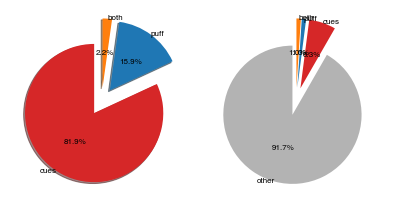

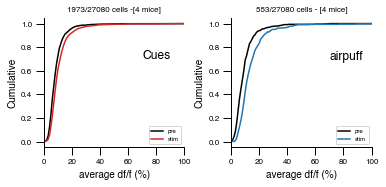

In [3]:

# Number of cells responding to each condition
fig = plt.figure()
fig.add_axes([.1,.1,0.4,0.8])
ncellsboth = np.sum((df.is_cue_responsive == 1) & (ndf.is_puff_responsive == 1))
ncellspuff = np.sum((df.is_cue_responsive == 0) & (ndf.is_puff_responsive == 1))
ncellscues = np.sum((df.is_cue_responsive == 1) & (ndf.is_puff_responsive == 0))
plt.pie([ncellscues,ncellspuff,ncellsboth], explode=(0.2, 0.2, 0.2), 
        labels=['cues','puff','both'], colors=colors[1:], 
        autopct='%2.1f%%',pctdistance=.5,labeldistance=1.,
        shadow=True, startangle=90,textprops=dict(fontsize=8))
fig.add_axes([.55,.1,0.4,0.8])
ncellsboth = np.sum((ndf.is_cue_responsive == 1) & (ndf.is_puff_responsive == 1))
ncellspuff = np.sum((ndf.is_cue_responsive == 0) & (ndf.is_puff_responsive == 1))
ncellscues = np.sum((ndf.is_cue_responsive == 1) & (ndf.is_puff_responsive == 0))
ncellsother = np.sum((ndf.is_cue_responsive == 0) & (ndf.is_puff_responsive == 0))
plt.pie([ncellsother,ncellscues,ncellspuff,ncellsboth], explode=(0.2,0.2, 0.2, 0.2), 
        labels=['other','cues','puff','both'], 
        colors=[[0.7,0.7,0.7]]+colors[1:], 
        autopct='%2.1f%%',pctdistance=.5,labeldistance=1.,
        shadow=False, startangle=90,textprops=dict(fontsize=8));
# fname = pjoin(pdfsavepath,'fig2_closed_loop_actuator_V1_piecharts.pdf')
# plt.savefig(fname);
# plt.savefig(fname.replace('.pdf','.svg'));
print(len(animalsessions['mouse_id'].drop_duplicates()),len(animalsessions),np.shape(ndf))

# Cue and puff histograms
ndf = []
for dd in range(len(animalsessions)):
    dd = animalsessions.iloc[dd]
    ndf.append(df[(df.session_name == dd.session_name) & (df.session_subname == dd.session_subname)])
ndf = pd.concat(ndf)
# Cells responding to each condition get the amplitudes stim and pre
sel = ndf[['cue_amplitudes','cue_amplitudes_pre',
           'puff_amplitudes','puff_amplitudes_pre']].copy()
sel['cue_avg'] = 0
sel['cue_avg_pre'] = 0
sel['puff_avg'] = 0
sel['puff_avg_pre'] = 0
for s in range(len(sel)):
    sel.cue_avg.iloc[s] = sel.cue_amplitudes.iloc[s].mean()
    sel.cue_avg_pre.iloc[s] = sel.cue_amplitudes_pre.iloc[s].mean()
    sel.puff_avg.iloc[s] = sel.puff_amplitudes.iloc[s].mean()
    sel.puff_avg_pre.iloc[s] = sel.puff_amplitudes_pre.iloc[s].mean()
    
from scipy.stats import ks_2samp    
# Figure
fig = plt.figure(figsize = [6.5,3])
fig.add_axes([.2,.2,0.3,0.6])
edges = np.arange(0,500)
idx = (ndf.is_cue_responsive == 1)
plotCumulative(np.array(sel[idx].cue_avg_pre).flatten(),edges,
               color = colors[0],label = 'pre')
plotCumulative(np.array(sel[idx].cue_avg).flatten(),edges,
               color = colors[1],
               label = 'stim')
plt.xlim([0,100])
plt.legend(fontsize = 6)
plt.xlabel('average df/f (%)')
plt.ylabel('Cumulative')
plt.title('{0}/{1} cells -[{2} mice]'.format(
    np.sum(idx),len(idx),len(np.unique(ndf.mouse_id))),
         fontsize = 8)
plt.text(70,0.7,'Cues',fontsize = 12)
print(ks_2samp(np.array(sel[idx].cue_avg_pre).flatten(),
               np.array(sel[idx].cue_avg).flatten()))

fig.add_axes([.6,.2,0.3,0.6])

idx = (ndf.is_puff_responsive == 1)
plotCumulative(np.array(sel[idx].puff_avg_pre).flatten(),edges,
               color = colors[0],label = 'pre')
plotCumulative(np.array(sel[idx].puff_avg).flatten(),edges,
               color = colors[2],
               label = 'stim')
plt.xlim([0,100])
plt.legend(fontsize = 6)
plt.xlabel('average df/f (%)')
plt.ylabel('Cumulative')
plt.title('{0}/{1} cells - [{2} mice]'.format(
    np.sum(idx),len(idx),len(np.unique(ndf.mouse_id))),
         fontsize = 8)
plt.text(70,0.7,'airpuff',fontsize = 12)
print(ks_2samp(np.array(sel[idx].puff_avg_pre).flatten(),
               np.array(sel[idx].puff_avg).flatten()))
#fname = pjoin(pdfsavepath,'fig2_closed_loop_actuator_V1_cumulatives.pdf')
# plt.savefig(fname);
#plt.savefig(fname.replace('.pdf','.svg'));
#fname = pjoin(pngsavepath,'fig2_closed_loop_actuator_V1_cumulatives.png')
# plt.savefig(fname);

In [8]:
from scipy.stats import ks_2samp
def plot_summary_closedloopactuator(df):
    fig = plt.figure(figsize = [8,7])
    # Scatter of cue mean amplitudes
    fig.add_axes([.56,.1,.2,.2])

    spre = np.stack(df.cue_amplitudes_pre).mean(axis = 2)
    sstim = np.stack(df.cue_amplitudes).mean(axis = 2)
    plt.plot(spre.flatten(),sstim.flatten(),'k.',alpha = 0.1,label='all')
    plt.plot(spre[df.is_cue_responsive == 1,:].flatten(),
             sstim[df.is_cue_responsive == 1 ,:].flatten(),'r.',alpha = 0.1,label='cue resp')
    plt.plot([0,200],[0,200],'k',lw=0.5)
    plt.xlabel('Pre-stim (avg df/f)')
    plt.ylabel('stim (avg df/f)')
    plt.text(20,200,'Cues',fontsize = 12)
    plt.legend(fontsize = 6)

    # Histograms of cue amplitudes
    fig.add_axes([.65,.43,0.2,0.2])
    edges = np.arange(0,500)
    spre = np.stack(df.cue_amplitudes_pre)
    sstim = np.stack(df.cue_amplitudes)
    idx = np.array(df.is_cue_responsive == 1) 
    plotCumulative(spre[idx,:].flatten(),edges,color = colors[0],label = 'pre')
    plotCumulative(sstim[idx,:].flatten(),edges,color = colors[1],label = 'stim')
    pval = ks_2samp(spre[idx,:].flatten(),sstim[idx,:].flatten())
    plt.text(50,0.3,'pval:{0:1.3f}'.format(pval.pvalue))
    plt.xlim([0,100])
    plt.legend(fontsize = 6)
    plt.xlabel('Mean df/f%')
    plt.ylabel('Cumulative')
    plt.title('{0}/{1} cells - ({3} cues) [{2} mouse]'.format(
        np.sum(idx),len(idx),len(np.unique(df.mouse_id)),spre.shape[1]),
             fontsize = 8)
    plt.text(70,0.7,'Cues',fontsize = 12)
    # Histograms of airpuff amplitudes
    fig.add_axes([.65,.75,0.2,0.2])
    spre = np.stack(df.puff_amplitudes_pre)
    sstim = np.stack(df.puff_amplitudes)
    idx = np.array(df.is_puff_responsive == 1) 
    plotCumulative(spre[idx].flatten(),edges,color = colors[0],label = 'pre')
    plotCumulative(sstim[idx].flatten(),edges,color = colors[2],label = 'stim')
    pval = ks_2samp(spre[idx].flatten(),sstim[idx].flatten())
    plt.text(50,0.3,'pval:{0:1.3f}'.format(pval.pvalue))
    plt.xlim([0,100])
    plt.legend(fontsize = 6)
    plt.xlabel('Mean df/f%')
    plt.ylabel('Cumulative')
    plt.title('{0}/{1} cells - [{2} mouse]'.format(
        np.sum(idx),len(idx),len(np.unique(df.mouse_id))),
             fontsize = 8)
    plt.text(70,0.7,'Airpuff',fontsize = 12)

    # Number of cells responding to each condition
    fig.add_axes([.85,.22,0.08,0.08])
    ncellsboth = np.sum((df.is_cue_responsive == 1) & (df.is_puff_responsive == 1))
    ncellspuff = np.sum((df.is_cue_responsive == 0) & (df.is_puff_responsive == 1))
    ncellscues = np.sum((df.is_cue_responsive == 1) & (df.is_puff_responsive == 0))
    plt.pie([ncellscues,ncellspuff,ncellsboth], 
            explode=(0.2, 0.2, 0.2), 
            labels=['cues','puff','both'], colors=colors[1:], 
            autopct='%2.1f%%',pctdistance=1.5,labeldistance=2.2,
            shadow=False, startangle=90,textprops=dict(fontsize=8))
    fig.add_axes([.85,.05,0.08,0.08])
    ncellsboth = np.sum((df.is_cue_responsive == 1) & (df.is_puff_responsive == 1))
    ncellspuff = np.sum((df.is_cue_responsive == 0) & (df.is_puff_responsive == 1))
    ncellscues = np.sum((df.is_cue_responsive == 1) & (df.is_puff_responsive == 0))
    ncellsother = np.sum((df.is_cue_responsive == 0) & (df.is_puff_responsive == 0))
    plt.pie([ncellsother,ncellscues,ncellspuff,ncellsboth], 
            explode=(0.2,0.2, 0.2, 0.2), 
            labels=['other','cues','puff','both'], 
            colors=[[0.5,0.5,0.5]]+colors[1:], 
            autopct='%2.1f%%',pctdistance=1.5,labeldistance=2.2,
            shadow=False, startangle=90,textprops=dict(fontsize=8))

    # The response position maps
    spre_std = np.stack(df.cue_amplitudes_pre).std(axis = 2).mean(axis = 1)
    spre = np.stack(df.cue_amplitudes_pre).mean(axis = 2).mean(axis = 1)
    sstim = np.stack(df.cue_amplitudes).mean(axis = 2).mean(axis = 1)

    zscoredrespall = np.stack(((df.mean_position_df_f.T - spre)/spre_std).T)
    isrespflag = 1
    idx0 = np.where((df.is_cue_responsive == isrespflag) & (df.is_puff_responsive == 0))[0]
    idx1 = np.where((df.is_cue_responsive == isrespflag) & (df.is_puff_responsive == 1))[0]
    zscoredresp = zscoredrespall[np.hstack([idx0,idx1])]
    startpuff = len(idx0)

    isrespflag = 0
    idx0 = np.where((df.is_cue_responsive == isrespflag) & (df.is_puff_responsive == 0))[0]
    idx1 = np.where((df.is_cue_responsive == isrespflag) & (df.is_puff_responsive == 1))[0]
    npuffonly = len(idx1)
    zscoredrespnot = zscoredrespall[np.hstack([idx1,idx0])]

    fig.add_axes([.2,.2,.25,.7])

    plt.imshow(np.vstack([zscoredresp,zscoredrespnot]),
               clim = [0,2],cmap = 'gray_r',aspect = 'auto',origin = 'bottom',
              interpolation = 'none')
    plt.plot([155,155],[0,len(zscoredresp)],color = 'k',lw = 2,clip_on = False)
    plt.plot([160,160],[startpuff,len(zscoredresp)+npuffonly],color = 'k',lw = 2,clip_on = False)
    plt.text(160,len(zscoredresp)/2,'cue resp',
             fontsize = 8,
             rotation = 90,va = 'center',ha = 'left')
    plt.text(165,len(zscoredresp)+(npuffonly)/2,'puff resp',
             fontsize = 8,
             rotation = 90,va = 'center',ha = 'left')
    plt.xlim([0,150])
    plt.xlabel('Position (cm)')
    plt.ylabel('Cell #')
    plt.colorbar(shrink=0.2,label = 'zscored df/f',
                 anchor = (.5,1),panchor = False)
    
    plt.vlines(df.belt_cues.iloc[0][:,0].flatten(),0,
               len(df),color = colors[1],linestyle = '--',lw = 0.5)
    for c in df.belt_cues.iloc[0]:
        plt.plot(c,np.array([0,0])+len(df),'--',lw = 1,
                 color = colors[1],clip_on = False)
    # The puffs in space
    key = dict(session_name = df.session_name.iloc[0],
           session_subname = df.session_subname.iloc[0])
    timestamps = np.vstack([df.stim_onsets.iloc[0],
                             df.stim_offsets.iloc[0]]).T
    Xd = lap_map_from_timestamps(timestamps,key)
    puffinspace = np.where(np.sum(
        Xd>1,axis = 0).squeeze()>Xd.shape[0]/4)[0][np.array([0,-1])]
    
    plt.vlines(puffinspace[0],0,
               len(df),color = colors[2],linestyle = '--',lw = 0.5)
    plt.plot(puffinspace,np.array([0,0])+len(df),':',lw = 1,
                 color = colors[2],clip_on = False)
    plt.ylim([0,len(df)])
    plt.title('[{2}] {0}\n{1}'.format(df.session_name.iloc[0],
                                           df.session_subname.iloc[0],
                                           df.recording_area.iloc[0]),
             fontsize = 8)


In [5]:
#PositionMaps()*PositionMapsStats()*TwoPhotonVolume() & 'recording_area = "S1"'
import pandas as pd
keys = [dict(session_name = '190126_JC092_2P_S1_JC',session_subname = 'run00_closedLoopActuator')]
dfs = []
for k in keys:
    dfs.append(pd.DataFrame((StimulusAirPuff.Triggered()*
                             PositionMaps.ActivityMaps()*
                             PositionMapsStats.ActivityMapStats()*
                             TreadmillPositionExperiment()*TreadmillBelt()
                             & k).fetch()))
df = pd.concat(dfs)


Text(0.5, 0, 'belt position (cm)')

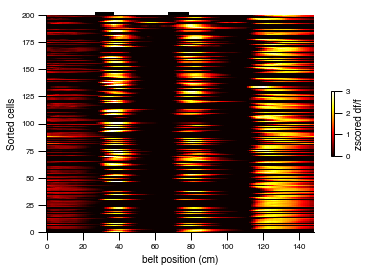

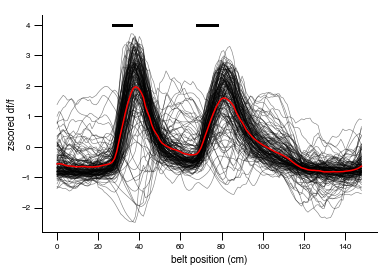

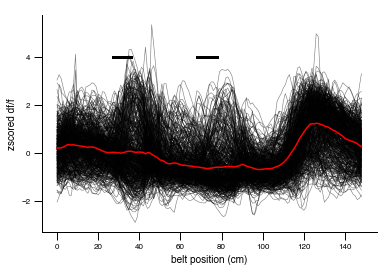

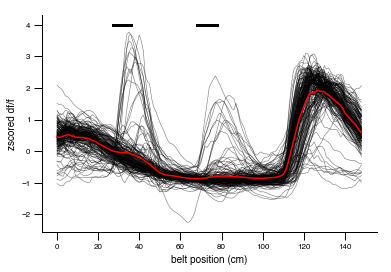

In [6]:
cuemaps = np.stack(df.df_f_map)
mcuemaps = cuemaps.mean(axis = 1)
zmcuemaps = ((mcuemaps.T - mcuemaps[:,:].mean(axis = 1))/mcuemaps[:,:].std(axis = 1)).T
tmp = mcuemaps[df.position_ev.argsort()]
posidx = np.where((df.is_position==1) & (df.is_puff == 0))[0]
puffidx = np.where((df.is_position==0) & (df.is_puff == 1))[0]
bothidx = np.where((df.is_position==1) & (df.is_puff == 1))[0]
noneidx = np.where((df.is_position==0) & (df.is_puff == 0))[0]
idx = np.concatenate([posidx,bothidx,puffidx,noneidx],axis = 0)
plt.figure()
plt.imshow(zmcuemaps[df.position_ev.argsort()[::-1]],aspect = 'auto',clim = [0,3],cmap = 'hot')
for c in df.belt_cues[0]:
    plt.plot(c,[202,202],'k',lw = 3,clip_on=False)
plt.xlabel('belt position (cm)')
plt.ylabel('Sorted cells')
plt.colorbar(label = 'zscored df/f',shrink=0.3)
plt.ylim([0,200])
plt.figure()
plt.plot(zmcuemaps[posidx].T,'k',lw = 0.6,alpha = 0.5);
plt.plot(zmcuemaps[posidx].mean(axis = 0),'r');
for c in df.belt_cues[0]:
    plt.plot(c,[4,4],'k',lw = 3,clip_on=False)
plt.ylabel('zscored df/f')
plt.xlabel('belt position (cm)')

plt.figure()
plt.plot(zmcuemaps[puffidx].T,'k',lw = 0.6,alpha = 0.5);
plt.plot(zmcuemaps[puffidx].mean(axis = 0),'r');
for c in df.belt_cues[0]:
    plt.plot(c,[4,4],'k',lw = 3,clip_on=False)
plt.ylabel('zscored df/f')
plt.xlabel('belt position (cm)')


plt.figure()
plt.plot(zmcuemaps[bothidx].T,'k',lw = 0.6,alpha = 0.5);
plt.plot(zmcuemaps[bothidx].mean(axis = 0),'r');
for c in df.belt_cues[0]:
    plt.plot(c,[4,4],'k',lw = 3,clip_on=False)
plt.ylabel('zscored df/f')
plt.xlabel('belt position (cm)')

<IPython.core.display.Javascript object>


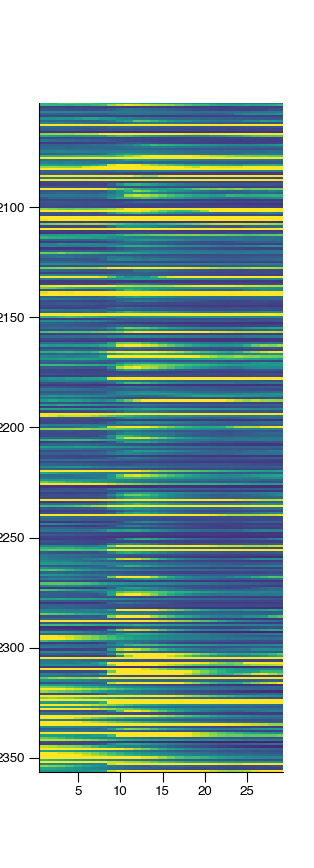

In [162]:
plt.figure()
plt.imshow(np.stack(df.cue_maps[df.position_ev.argsort()],axis = 0)[:,0,...].mean(axis = 1),
           aspect = 'auto',clim = [0,50])

<IPython.core.display.Javascript object>


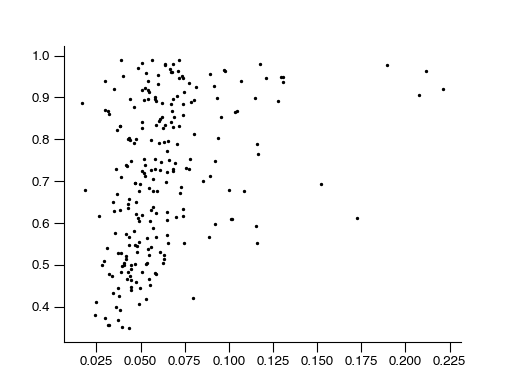

In [152]:
posidx = (df.is_position==1) & (df.is_puff == 0)
puffidx = (df.is_position==0) & (df.is_puff == 1)
bothidx = (df.is_position==1) & (df.is_puff == 1)
plt.figure()
plt.plot(df.position_reliability[posidx],df.puff_avg_trial_corr[posidx],'.',markerfacecolor = colors[0])
#plt.plot(df.cue_amplitude[puffidx],df.puff_response_amplitude[puffidx],'.',markerfacecolor = colors[1])
#plt.plot(df.cue_amplitude[bothidx],df.puff_response_amplitude[bothidx],'.',markerfacecolor = colors[2])

<IPython.core.display.Javascript object>


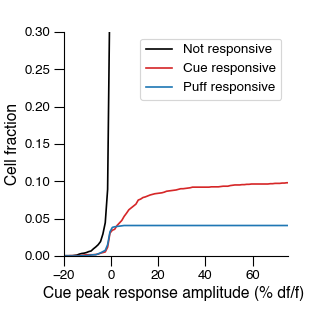

<IPython.core.display.Javascript object>


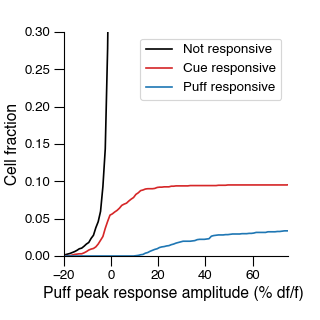

(0, 0.3)

In [130]:
edges = np.arange(-20,300,1)
bins,ed = np.histogram(df.cue_amplitude[posidx],edges)
fig = plt.figure(figsize = [4,4])
fig.add_axes([.2,.2,.7,.7])
x = ed[:-1]+np.diff(ed[:2])/2.
bins,ed = np.histogram(df.cue_amplitude[noneidx],edges)
plt.plot(x,np.cumsum(bins)/len(df),label = 'Not responsive')
bins,ed = np.histogram(df.cue_amplitude[posidx],edges)
plt.plot(x,np.cumsum(bins)/len(df),label = 'Cue responsive')
bins,ed = np.histogram(df.cue_amplitude[np.hstack([puffidx,bothidx])],edges)
plt.plot(x,np.cumsum(bins)/len(df),label = 'Puff responsive')
plt.legend()
plt.ylabel('Cell fraction')
plt.xlabel('Cue peak response amplitude (% df/f) ')
plt.xlim([-20,75])
plt.ylim([0,.3])

edges = np.arange(-20,300,1)
bins,ed = np.histogram(df.cue_amplitude[posidx],edges)
fig = plt.figure(figsize = [4,4])
fig.add_axes([.2,.2,.7,.7])
x = ed[:-1]+np.diff(ed[:2])/2.
bins,ed = np.histogram(df.puff_response_amplitude[noneidx],edges)
plt.plot(x,np.cumsum(bins)/len(df),label = 'Not responsive')




bins,ed = np.histogram(df.puff_response_amplitude[posidx],edges)
plt.plot(x,np.cumsum(bins)/len(df),label = 'Cue responsive')
bins,ed = np.histogram(df.puff_response_amplitude[np.hstack([puffidx,bothidx])],edges)
plt.plot(x,np.cumsum(bins)/len(df),label = 'Puff responsive')
plt.legend()
plt.ylabel('Cell fraction')
plt.xlabel('Puff peak response amplitude (% df/f) ')
plt.xlim([-20,75])
plt.ylim([0,.3])